/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
RNN R²: 0.9754769579433026
LSTM R²: 0.9753918183821334


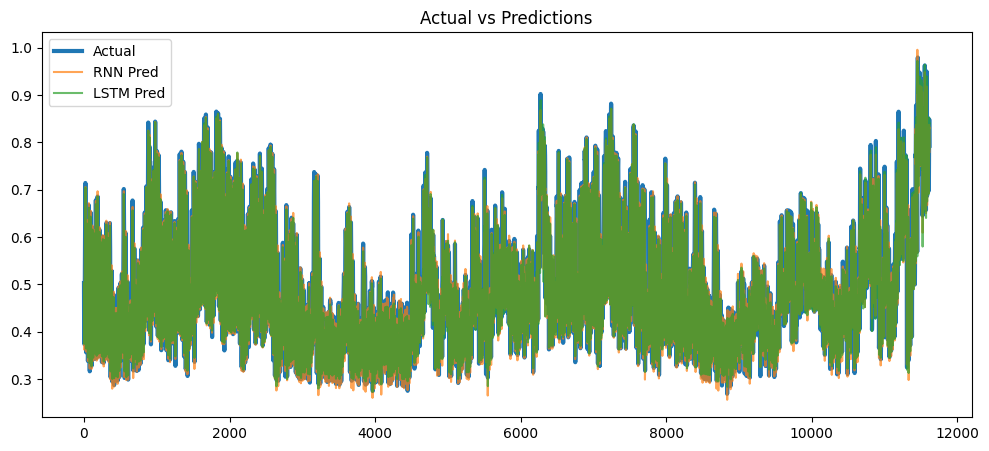

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense, Dropout

# 1) Load data
df = pd.read_csv("DOM_hourly.csv", parse_dates=['Datetime'], index_col='Datetime')
data = df.values.reshape(-1,1)   # use the only column (power)

# 2) Normalize
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 3) Create sequences (X: last 24 steps → y: next step)
def make_seq(data, seq=24):
    X, y = [], []
    for i in range(len(data)-seq):
        X.append(data[i:i+seq])
        y.append(data[i+seq])
    return np.array(X), np.array(y)

X, y = make_seq(data, 24)
train_size = int(0.9*len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4) Simple RNN Model
rnn = Sequential([
    SimpleRNN(50, input_shape=(24,1)),
    Dense(20, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
rnn.compile(optimizer="adam", loss="mse")
rnn.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)
pred_rnn = rnn.predict(X_test)

# 5) LSTM Model
lstm = Sequential([
    LSTM(50, input_shape=(24,1)),
    Dense(20, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
lstm.compile(optimizer="adam", loss="mse")
lstm.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)
pred_lstm = lstm.predict(X_test)

# 6) Evaluate
print("RNN R²:", r2_score(y_test, pred_rnn))
print("LSTM R²:", r2_score(y_test, pred_lstm))

# 7) Plot Comparison
plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual", linewidth=3)
plt.plot(pred_rnn, label="RNN Pred", alpha=0.7)
plt.plot(pred_lstm, label="LSTM Pred", alpha=0.7)
plt.legend(); plt.title("Actual vs Predictions"); plt.show()


Head:
                      DOM_MW
Datetime                   
2005-12-31 01:00:00  9389.0
2005-12-31 02:00:00  9070.0
2005-12-31 03:00:00  9001.0
2005-12-31 04:00:00  9042.0
2005-12-31 05:00:00  9132.0

Missing Values:
 DOM_MW    0
dtype: int64


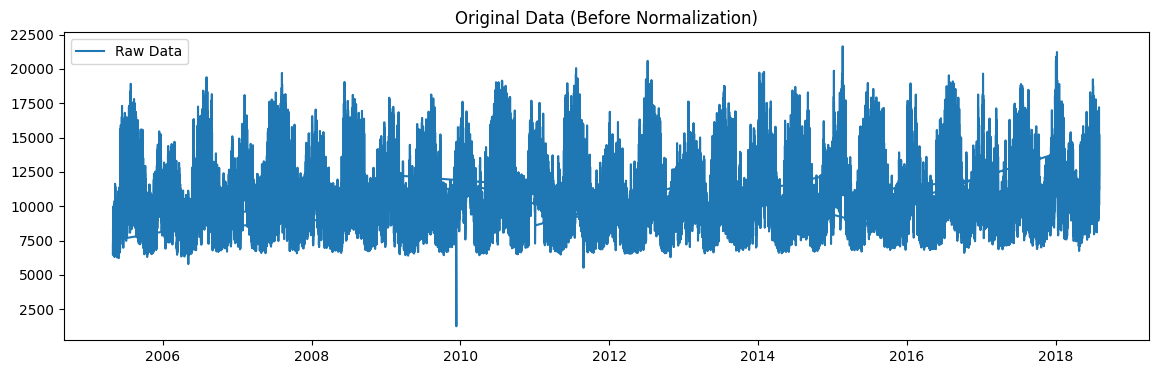

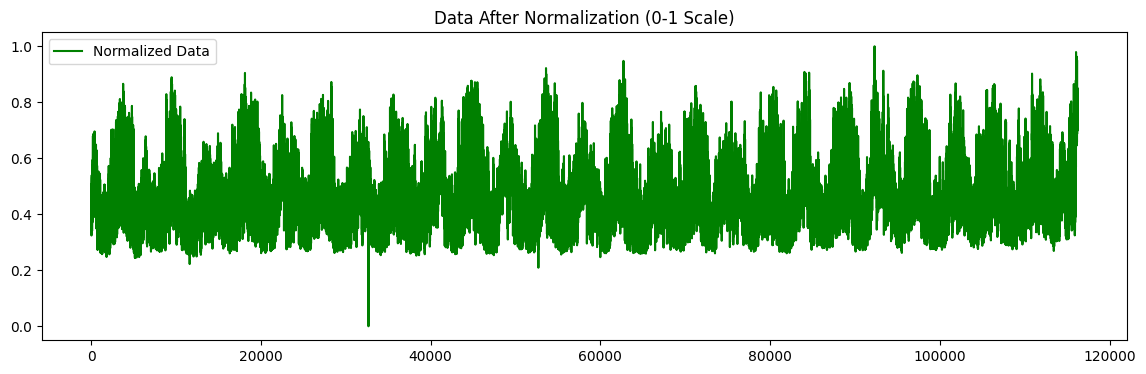

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

RNN R²: 0.9760266400278644


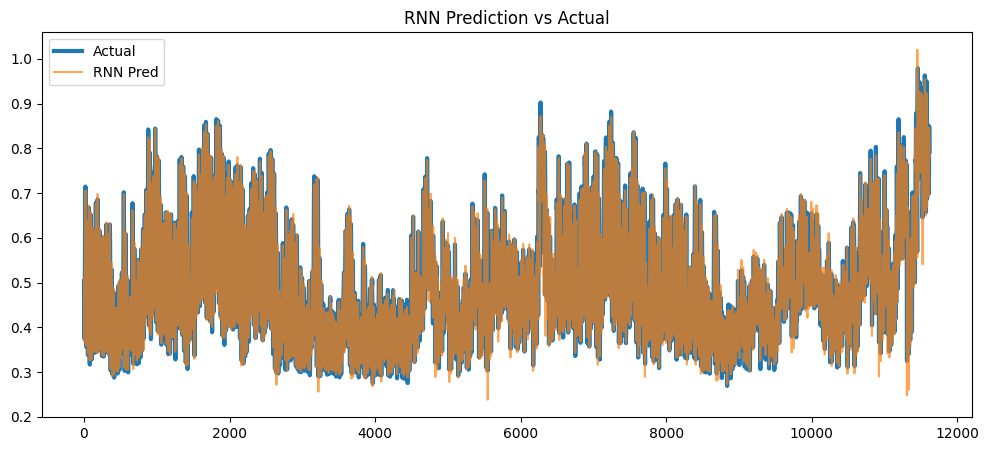

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
LSTM R²: 0.9740715519208201


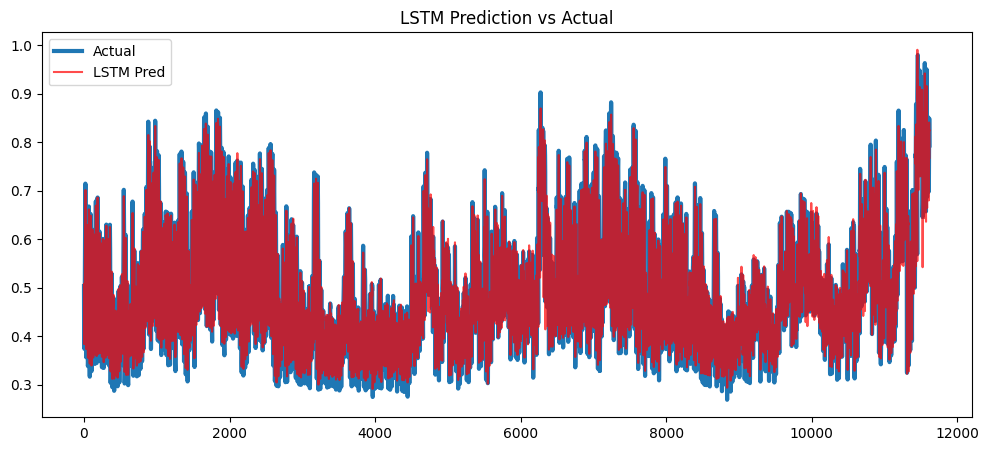

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
GRU R²: 0.970174858469957


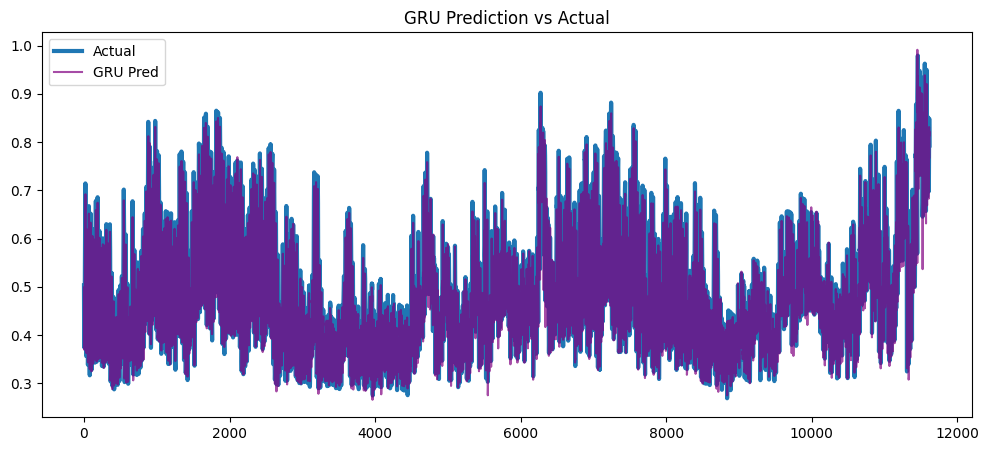

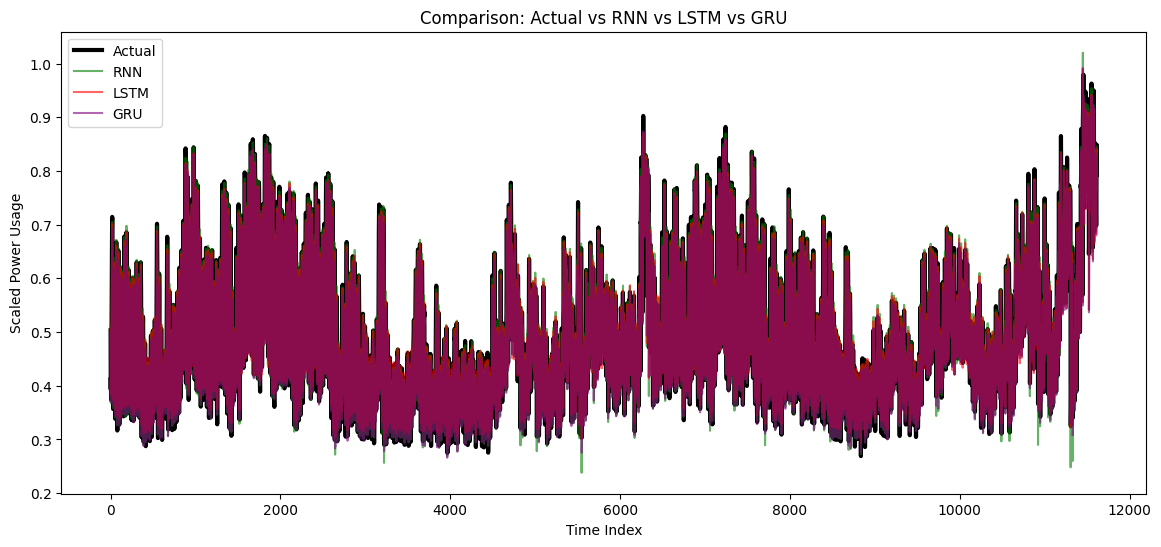

In [2]:
# -------------------- IMPORT LIBRARIES --------------------
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout

# -------------------- LOAD & INSPECT DATA --------------------
df = pd.read_csv("DOM_hourly.csv", parse_dates=['Datetime'], index_col='Datetime')
print("Head:\n", df.head())
print("\nMissing Values:\n", df.isna().sum())

# -------------------- PLOT RAW DATA --------------------
plt.figure(figsize=(14,4))
plt.plot(df, label="Raw Data")
plt.title("Original Data (Before Normalization)")
plt.legend(); plt.show()

# -------------------- NORMALIZATION --------------------
scaler = MinMaxScaler()
data = scaler.fit_transform(df.values.reshape(-1,1))

# -------------------- PLOT NORMALIZED DATA --------------------
plt.figure(figsize=(14,4))
plt.plot(data, label="Normalized Data", color='green')
plt.title("Data After Normalization (0-1 Scale)")
plt.legend(); plt.show()

# -------------------- SEQUENCE GENERATION --------------------
def make_seq(data, seq_len=24):
    X, y = [], []
    for i in range(len(data)-seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X, y = make_seq(data, 24)

# Train-test split
split = int(0.9*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# -------------------- SIMPLE RNN MODEL --------------------
rnn = Sequential([
    SimpleRNN(50, input_shape=(24,1)),
    Dense(20, activation='relu'), Dropout(0.2),
    Dense(1)
])
rnn.compile(optimizer="adam", loss="mse")
rnn.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

pred_rnn = rnn.predict(X_test)
print("\nRNN R²:", r2_score(y_test, pred_rnn))

# Plot RNN
plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual", linewidth=3)
plt.plot(pred_rnn, label="RNN Pred", alpha=0.7)
plt.title("RNN Prediction vs Actual"); plt.legend(); plt.show()

# -------------------- LSTM MODEL --------------------
lstm = Sequential([
    LSTM(50, input_shape=(24,1)),
    Dense(20, activation='relu'), Dropout(0.2),
    Dense(1)
])
lstm.compile(optimizer="adam", loss="mse")
lstm.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

pred_lstm = lstm.predict(X_test)
print("LSTM R²:", r2_score(y_test, pred_lstm))

# Plot LSTM
plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual", linewidth=3)
plt.plot(pred_lstm, label="LSTM Pred", alpha=0.7, color='red')
plt.title("LSTM Prediction vs Actual"); plt.legend(); plt.show()

# -------------------- GRU MODEL --------------------
gru = Sequential([
    GRU(50, input_shape=(24,1)),
    Dense(20, activation='relu'), Dropout(0.2),
    Dense(1)
])
gru.compile(optimizer="adam", loss="mse")
gru.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

pred_gru = gru.predict(X_test)
print("GRU R²:", r2_score(y_test, pred_gru))

# Plot GRU
plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual", linewidth=3)
plt.plot(pred_gru, label="GRU Pred", alpha=0.7, color='purple')
plt.title("GRU Prediction vs Actual"); plt.legend(); plt.show()

# -------------------- FINAL COMPARISON PLOT --------------------
plt.figure(figsize=(14,6))
plt.plot(y_test, label="Actual", linewidth=3, color="black")
plt.plot(pred_rnn, label="RNN", alpha=0.6, color="green")
plt.plot(pred_lstm, label="LSTM", alpha=0.6, color="red")
plt.plot(pred_gru, label="GRU", alpha=0.6, color="purple")
plt.title("Comparison: Actual vs RNN vs LSTM vs GRU")
plt.xlabel("Time Index"); plt.ylabel("Scaled Power Usage")
plt.legend(); plt.show()


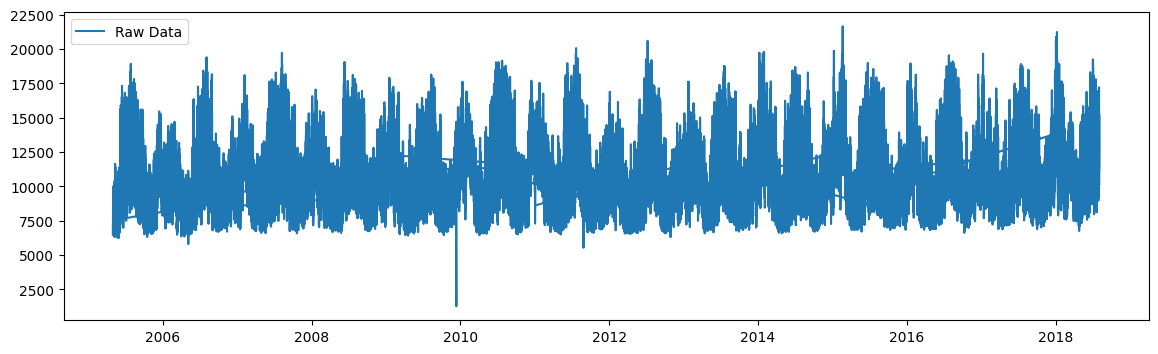

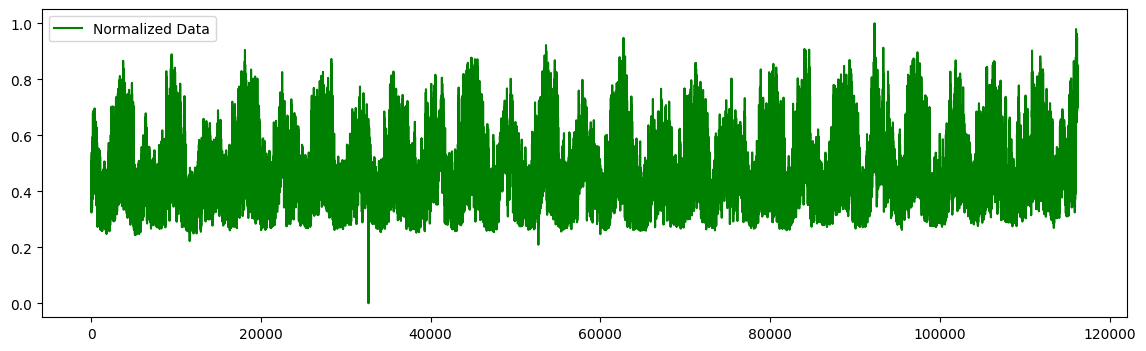

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3268/3268 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0044
Epoch 2/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 9.3884e-04
Epoch 3/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 8.8249e-04
Epoch 4/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 8.7283e-04
Epoch 5/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 8.3468e-04
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RNN R²: 0.9715454095978351


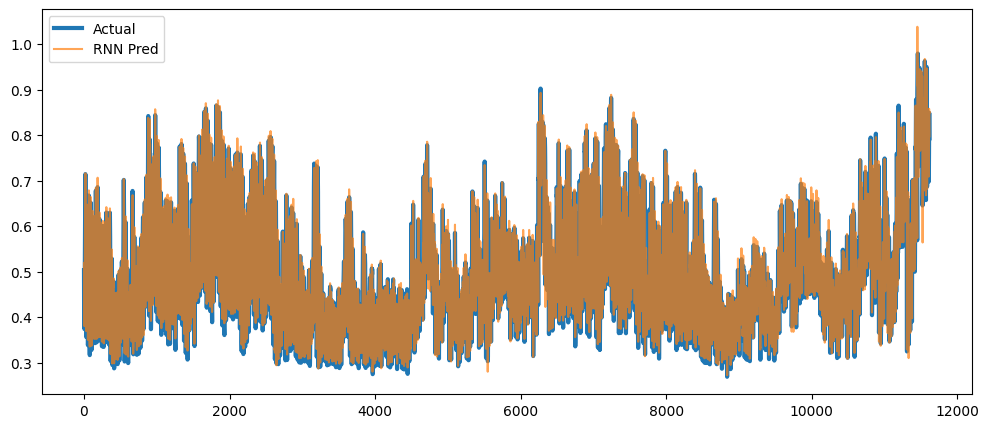

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3268/3268 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0073
Epoch 2/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 9.1785e-04
Epoch 3/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - loss: 8.5140e-04
Epoch 4/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 8.0346e-04
Epoch 5/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 7.7758e-04
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
LSTM R²: 0.9760091459188889


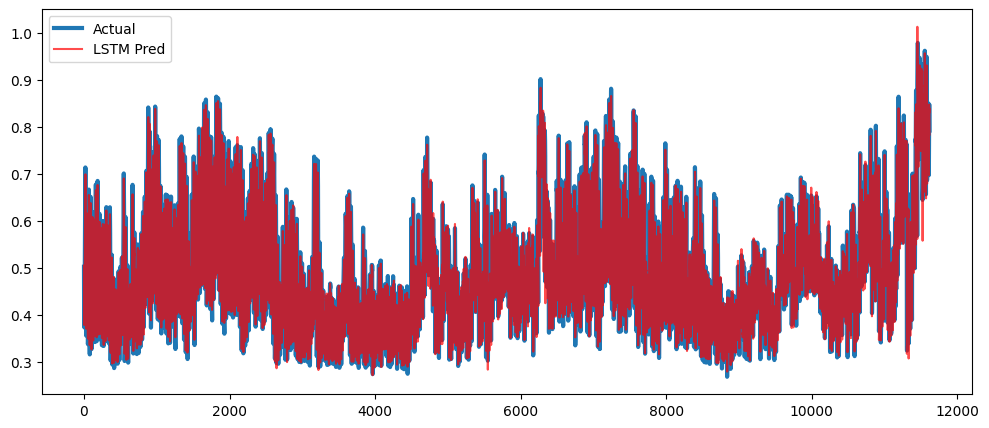

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3268/3268 ━━━━━━━━━━━━━━━━━━━━ 53s 15ms/step - loss: 0.0099
Epoch 2/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 50s 15ms/step - loss: 9.2578e-04
Epoch 3/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - loss: 9.0621e-04
Epoch 4/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - loss: 8.4426e-04
Epoch 5/5
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 51s 16ms/step - loss: 7.7160e-04
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
GRU R²: 0.959707957908998


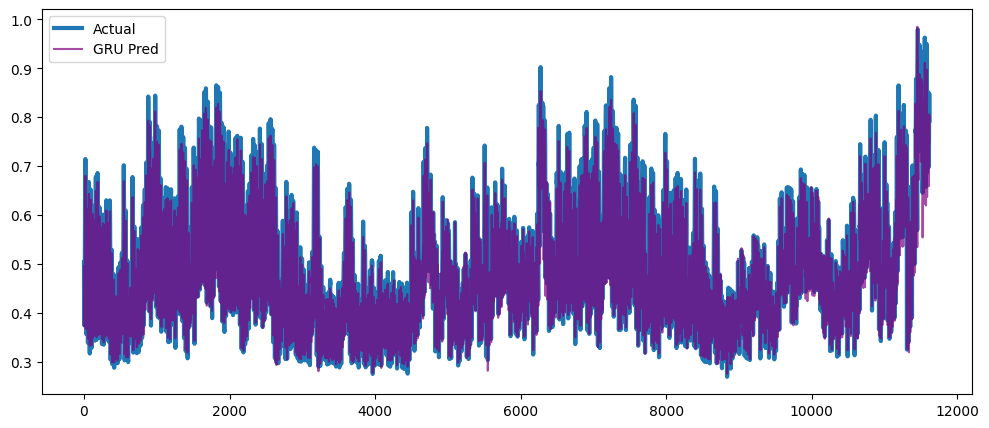

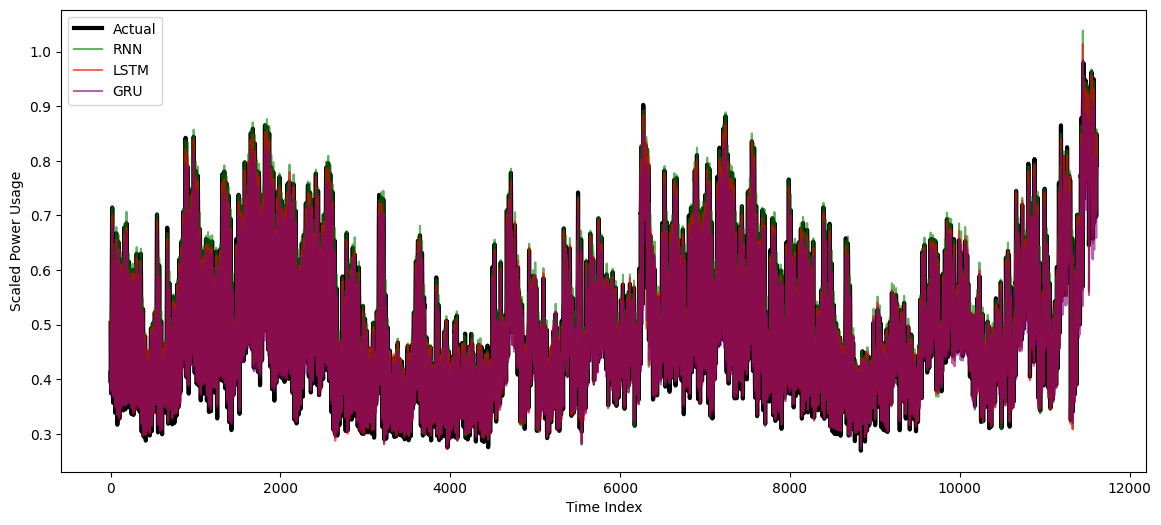

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout

df = pd.read_csv("DOM_hourly.csv", parse_dates=['Datetime'], index_col='Datetime')

plt.figure(figsize=(14,4))
plt.plot(df, label="Raw Data")
plt.legend(); plt.show()

scaler = MinMaxScaler()
data = scaler.fit_transform(df.values.reshape(-1,1))

plt.figure(figsize=(14,4))
plt.plot(data, label="Normalized Data", color='green')
plt.legend(); plt.show()

def make_seq(data, seq_len=24):
    X, y = [], []
    for i in range(len(data)-seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X, y = make_seq(data, 24)
split = int(0.9*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

rnn = Sequential([
    SimpleRNN(50, input_shape=(24,1)),
    Dense(20, activation='relu'), Dropout(0.2),
    Dense(1)
])
rnn.compile(optimizer="adam", loss="mse")
rnn.fit(X_train, y_train, epochs=5)
pred_rnn = rnn.predict(X_test)
print("RNN R²:", r2_score(y_test, pred_rnn))

plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual", linewidth=3)
plt.plot(pred_rnn, label="RNN Pred", alpha=0.7)
plt.legend(); plt.show()

lstm = Sequential([
    LSTM(50, input_shape=(24,1)),
    Dense(20, activation='relu'), Dropout(0.2),
    Dense(1)
])
lstm.compile(optimizer="adam", loss="mse")
lstm.fit(X_train, y_train, epochs=5)
pred_lstm = lstm.predict(X_test)
print("LSTM R²:", r2_score(y_test, pred_lstm))

plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual", linewidth=3)
plt.plot(pred_lstm, label="LSTM Pred", alpha=0.7, color='red')
plt.legend(); plt.show()

gru = Sequential([
    GRU(50, input_shape=(24,1)),
    Dense(20, activation='relu'), Dropout(0.2),
    Dense(1)
])
gru.compile(optimizer="adam", loss="mse")
gru.fit(X_train, y_train, epochs=5)
pred_gru = gru.predict(X_test)
print("GRU R²:", r2_score(y_test, pred_gru))

plt.figure(figsize=(12,5))
plt.plot(y_test, label="Actual", linewidth=3)
plt.plot(pred_gru, label="GRU Pred", alpha=0.7, color='purple')
plt.legend(); plt.show()

plt.figure(figsize=(14,6))
plt.plot(y_test, label="Actual", linewidth=3, color="black")
plt.plot(pred_rnn, label="RNN", alpha=0.6, color="green")
plt.plot(pred_lstm, label="LSTM", alpha=0.6, color="red")
plt.plot(pred_gru, label="GRU", alpha=0.6, color="purple")
plt.xlabel("Time Index"); plt.ylabel("Scaled Power Usage")
plt.legend(); plt.show()